In [2]:
# Install necessary packages
!pip install tensorflow

# Import required libraries
import tensorflow as tf
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to a scale of 0 to 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the ANN model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images
model.add(Dense(128, activation='relu'))  # Hidden layer with 128 neurons and ReLU activation
model.add(Dense(64, activation='relu'))   # Another hidden layer with 64 neurons and ReLU activation
model.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons for the 10 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Save the model
keras.saving.save_model(model, 'my_model.keras')

# Provide the model for download
from google.colab import files
files.download('my_model.keras')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8797 - loss: 0.4216 - val_accuracy: 0.9598 - val_loss: 0.1309
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9680 - loss: 0.1060 - val_accuracy: 0.9736 - val_loss: 0.0914
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9786 - loss: 0.0701 - val_accuracy: 0.9712 - val_loss: 0.0994
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9840 - loss: 0.0508 - val_accuracy: 0.9731 - val_loss: 0.0905
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9876 - loss: 0.0404 - val_accuracy: 0.9764 - val_loss: 0.0783
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9896 - loss: 0.0318 - val_accuracy: 0.9776 - val_loss: 0.0797
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9915 - loss: 0.0272 - val_accuracy: 0.9780 - val_loss: 0.0792
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9929 - loss: 0.02

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
!pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


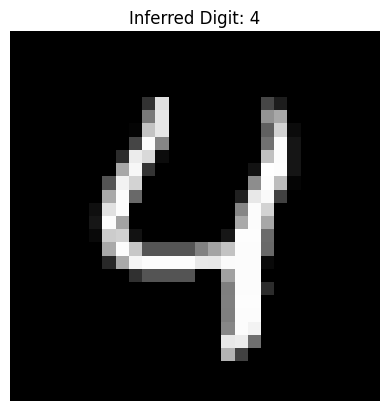

Actual Digit: 4
Predicted Digit: 4


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('my_model.keras')

# Select a sample image of digit '4' from the test set
# Find the index of the first occurrence of the digit '4' in the test labels
index_of_digit_5 = np.where(np.argmax(y_test, axis=1) == 4)[0][0]

# Get the corresponding image and label from the test set
sample_image = X_test[index_of_digit_5]
sample_label = y_test[index_of_digit_5]

# Reshape the sample image for inference
sample_image_reshaped = sample_image.reshape(1, 28, 28)

# Predict the class of the sample image using the trained model
prediction = model.predict(sample_image_reshaped)
predicted_digit = np.argmax(prediction)

# Display the sample image
plt.imshow(sample_image, cmap='gray')
plt.title(f'Inferred Digit: {predicted_digit}')
plt.axis('off')
plt.show()

# Print the actual and predicted values
print(f"Actual Digit: {np.argmax(sample_label)}")
print(f"Predicted Digit: {predicted_digit}")


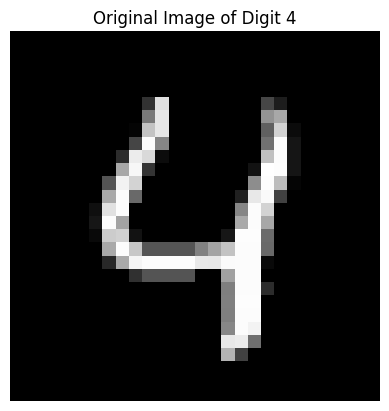

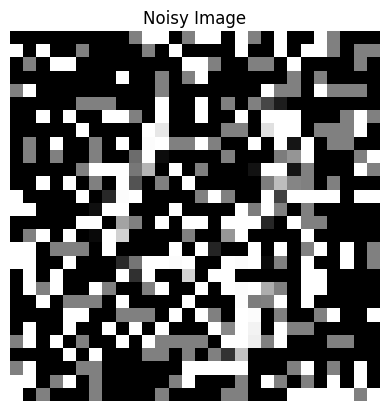

Original Predicted Digit: 4
Original Confidence Score: 1.0000
Noisy Predicted Digit: 5
Noisy Confidence Score: 0.0000
Lost Confidence: 1.0000


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the evaluate function
def evaluate(image):
    """Function to evaluate the confidence of the model's prediction."""
    image_reshaped = image.reshape(1, 28, 28)  # Reshape the image for inference


    prediction = model.predict(image_reshaped,verbose=0)  # Get prediction from the model
    confidence =  prediction[0, 4]  # Confidence is the max probability
    predicted_digit = np.argmax(prediction)  # Predicted class
    return predicted_digit, confidence

# Select a sample image of digit '4' from the test set
index_of_digit_4 = np.where(np.argmax(y_test, axis=1) == 4)[0][0]
sample_image = X_test[index_of_digit_4]

# Evaluate confidence of the original image
original_predicted_digit, original_confidence = evaluate(sample_image)

# Display the original sample image
plt.imshow(sample_image, cmap='gray')
plt.title(f'Original Image of Digit 4')
plt.axis('off')
plt.show()

# Generate random noise in the range -2, -1, 0, 1, 2 and add to the sample image
noise = np.random.choice([-2, -1, 0, 1, 2], size=sample_image.shape)/2

noisy_image = sample_image + noise

# Ensure the pixel values remain in the valid range [0, 1]
noisy_image = np.clip(noisy_image, 0, 1)

# Display the noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title(f'Noisy Image')
plt.axis('off')
plt.show()

# Evaluate confidence of the noisy image
noisy_predicted_digit, noisy_confidence = evaluate(noisy_image)

# Calculate lost confidence
lost_confidence = original_confidence - noisy_confidence

# Print the results
print(f"Original Predicted Digit: {original_predicted_digit}")
print(f"Original Confidence Score: {original_confidence:.4f}")
print(f"Noisy Predicted Digit: {noisy_predicted_digit}")
print(f"Noisy Confidence Score: {noisy_confidence:.4f}")
print(f"Lost Confidence: {lost_confidence:.4f}")


In [8]:
import numpy as np

def normalize(V):
    """
    Normalize the input array V to the range [0, 1].

    Parameters:
    V (numpy.ndarray): The input array to be normalized.

    Returns:
    numpy.ndarray: The normalized array with values in the range [0, 1].
    """
    # Convert to numpy array if it's not already
    V = np.array(V)

    # Find the minimum and maximum values in the array
    V_min = np.min(V)
    V_max = np.max(V)

    # Avoid division by zero in case V_max is equal to V_min
    if V_max == V_min:
        return   [1/len(V) for i in V] # all are equal

    # Normalize the array
    normalized_V = (V - V_min) / (V_max - V_min)



    normalized_V = normalized_V / np.sum(normalized_V)

    return normalized_V


<ipython-input-15-11aeb0580980>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  policy[i][j][k] = np.random.choice([0.49,0.5,0.51], size=1)
<ipython-input-15-11aeb0580980>:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  noise_choice[i][j]  = int(np.random.choice(len(choices),p = normalize(policy[i][j]) , size=1) )


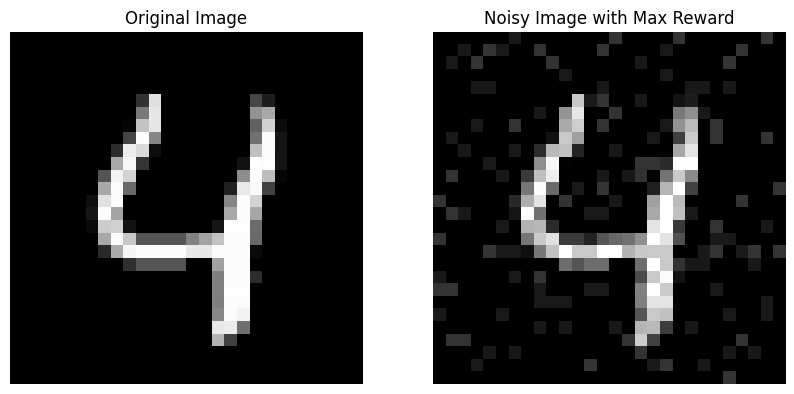

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.9990
Predicted Digit for Best Noisy Image: 4


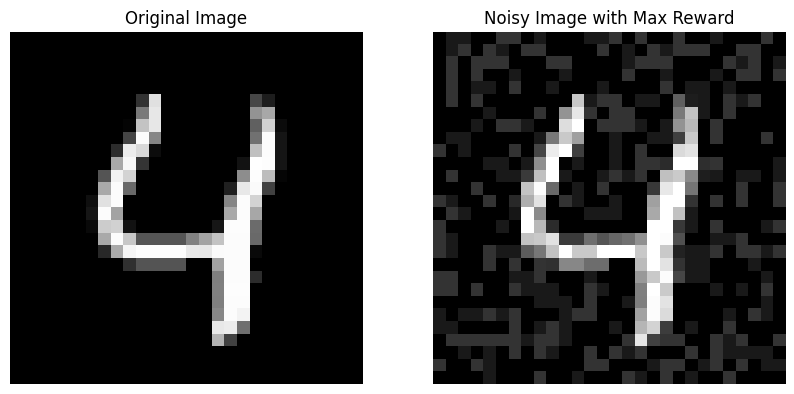

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.1762
Predicted Digit for Best Noisy Image: 9


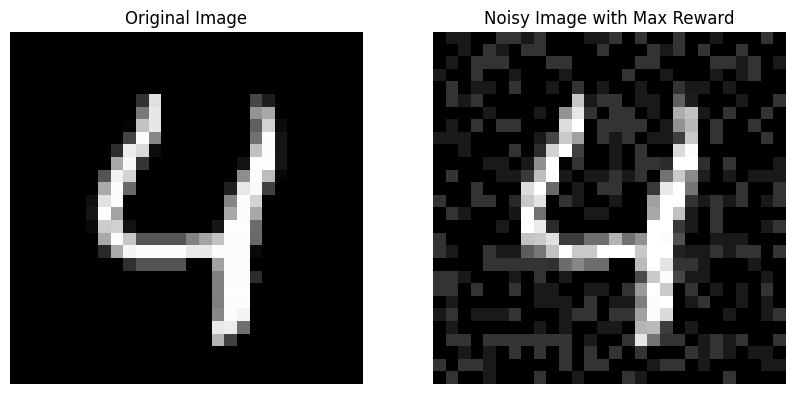

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.1341
Predicted Digit for Best Noisy Image: 9


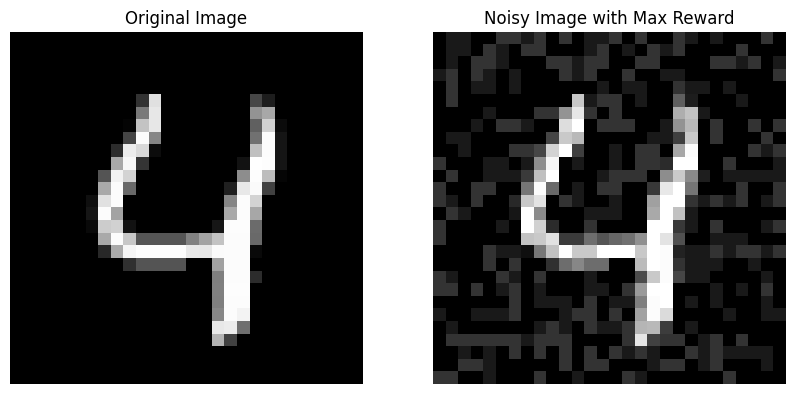

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0861
Predicted Digit for Best Noisy Image: 9


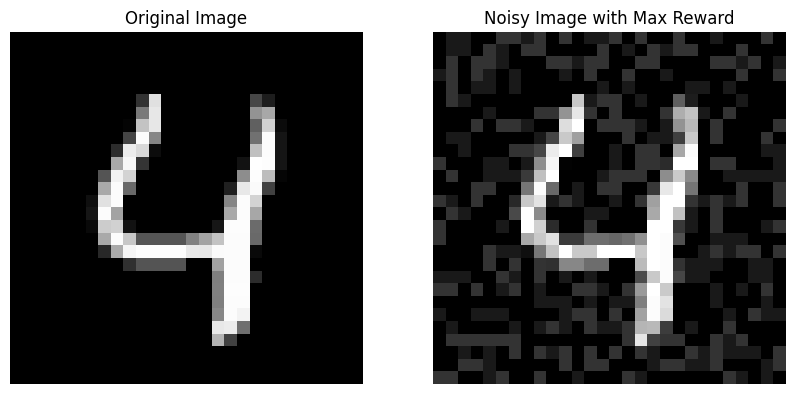

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0585
Predicted Digit for Best Noisy Image: 9


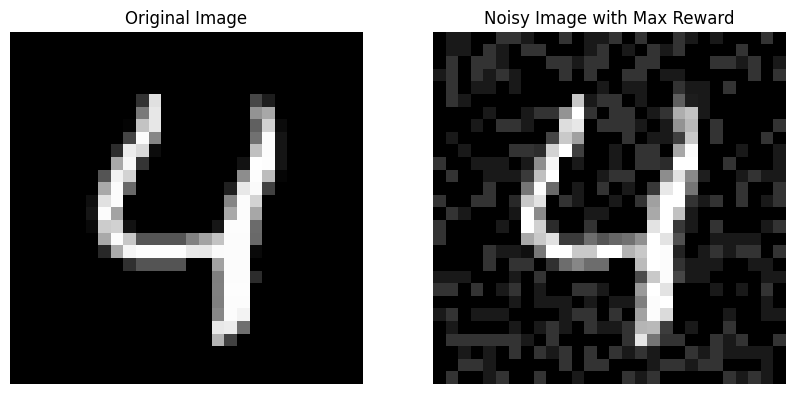

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0145
Predicted Digit for Best Noisy Image: 9


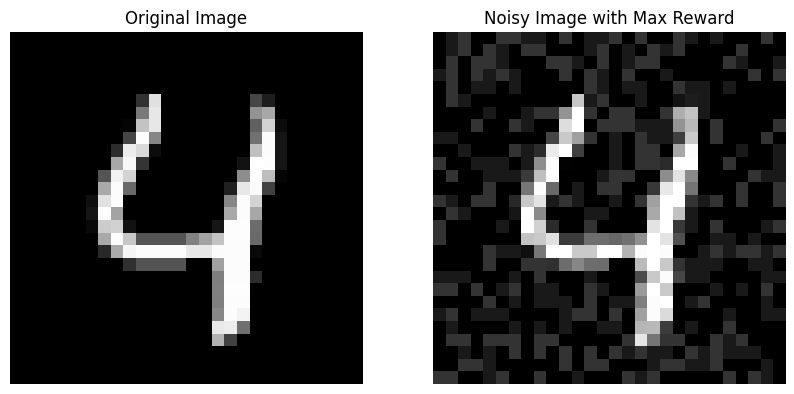

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0252
Predicted Digit for Best Noisy Image: 9


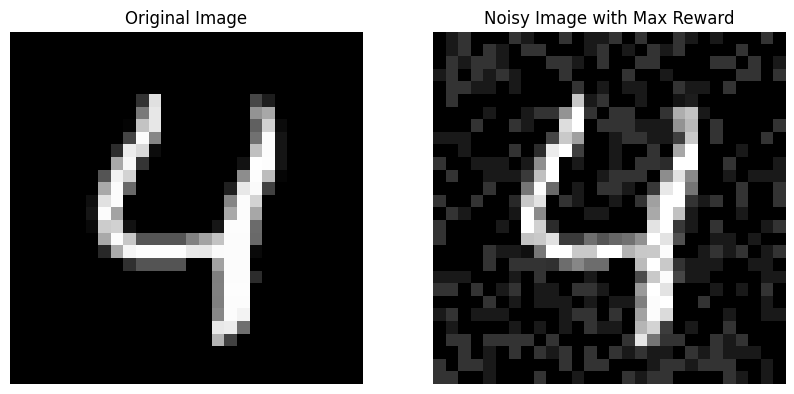

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0061
Predicted Digit for Best Noisy Image: 9


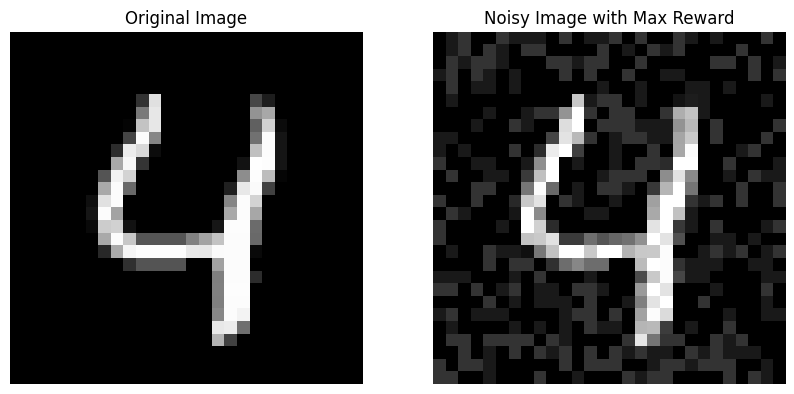

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0021
Predicted Digit for Best Noisy Image: 9


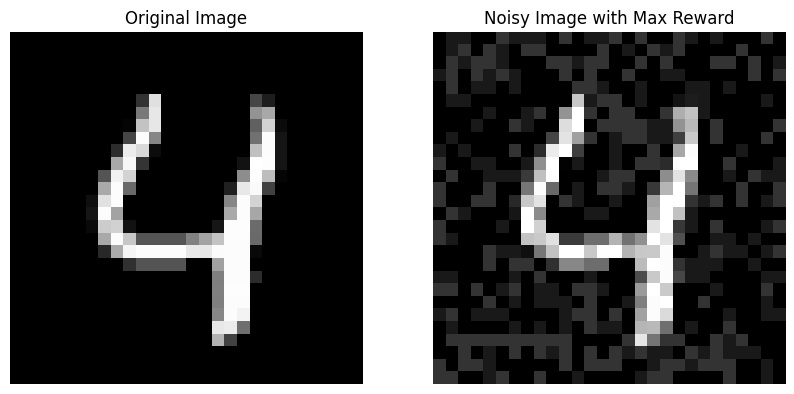

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0016
Predicted Digit for Best Noisy Image: 9


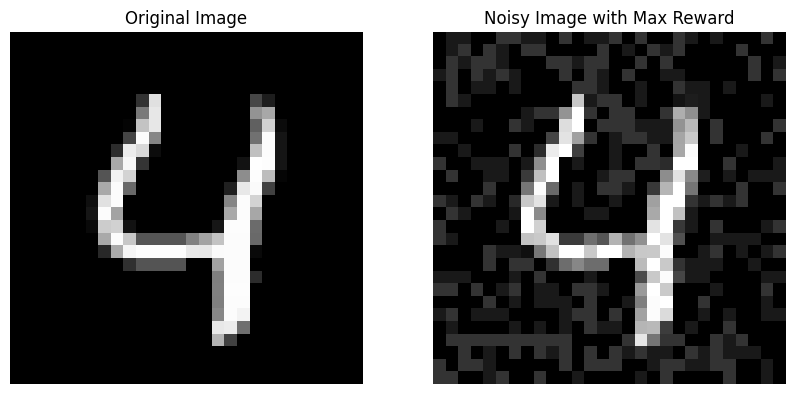

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0014
Predicted Digit for Best Noisy Image: 9


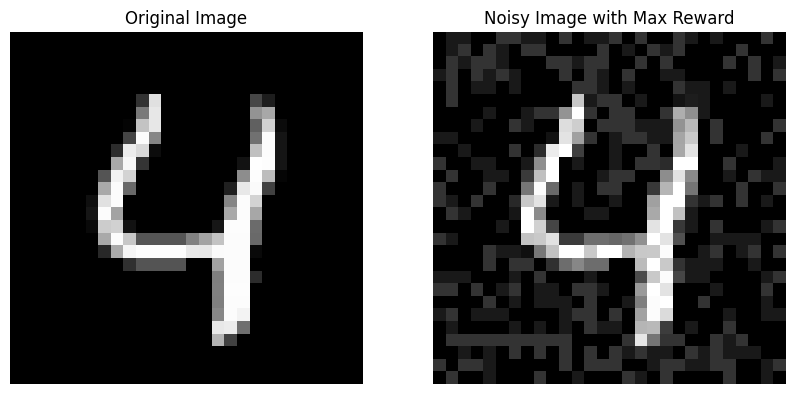

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0010
Predicted Digit for Best Noisy Image: 9


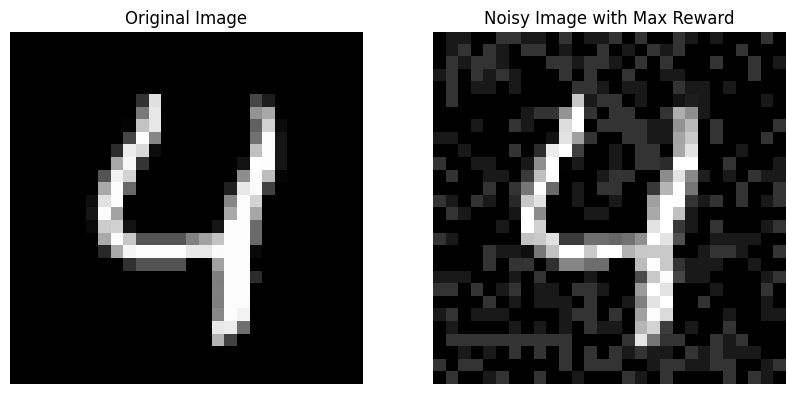

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0006
Predicted Digit for Best Noisy Image: 9


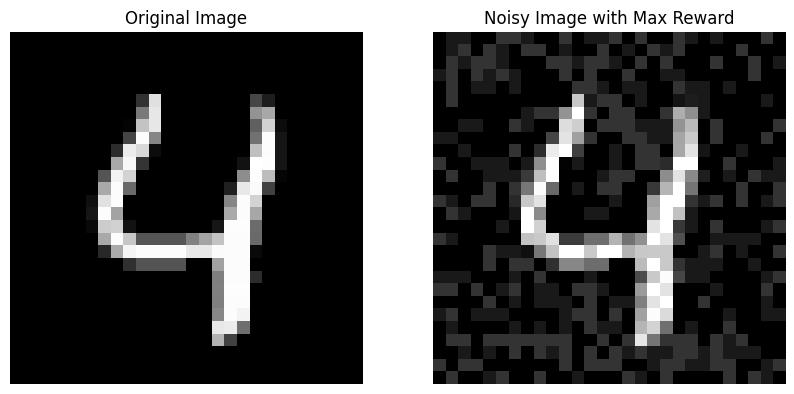

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0004
Predicted Digit for Best Noisy Image: 9


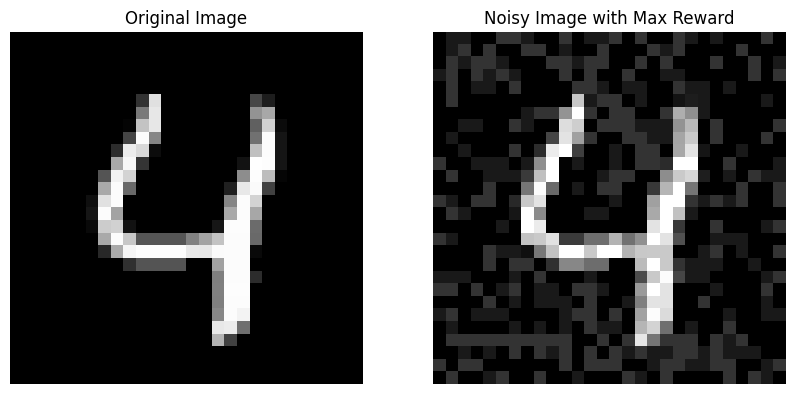

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0002
Predicted Digit for Best Noisy Image: 9


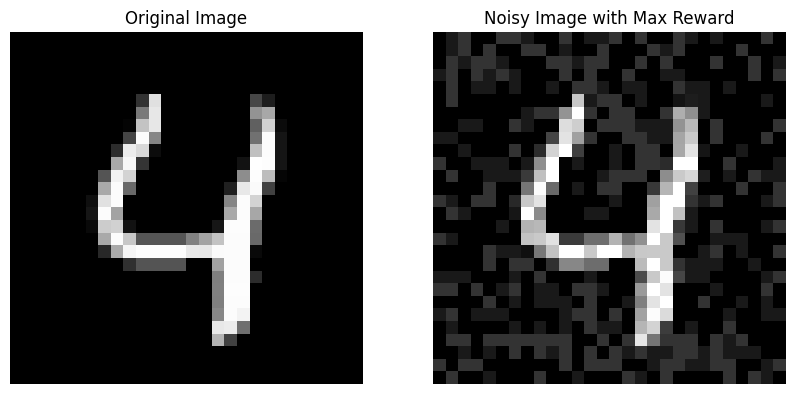

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0001
Predicted Digit for Best Noisy Image: 9


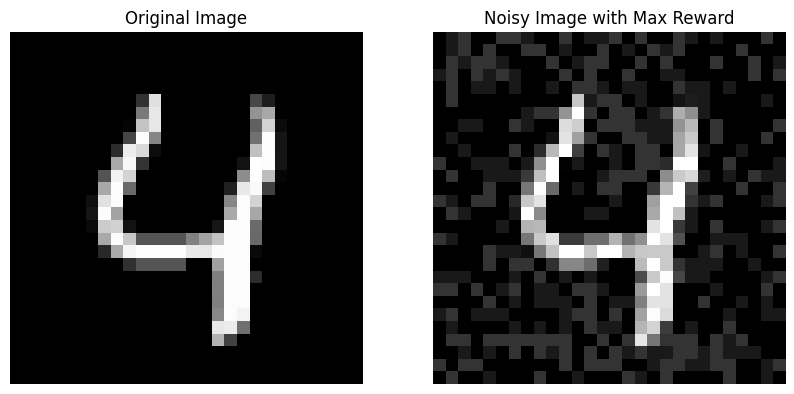

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0001
Predicted Digit for Best Noisy Image: 9


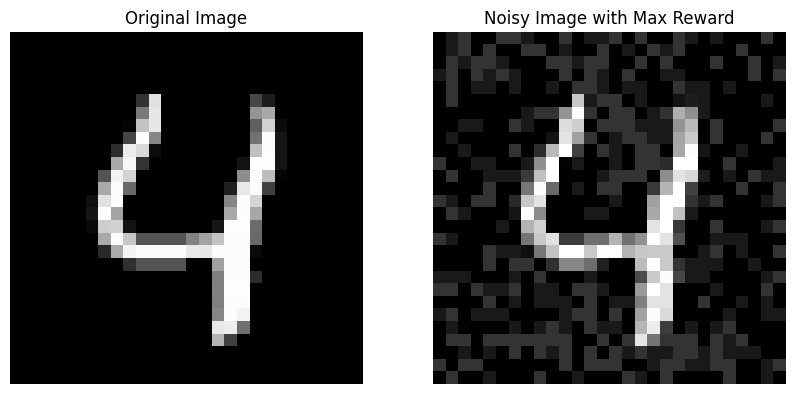

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0001
Predicted Digit for Best Noisy Image: 9


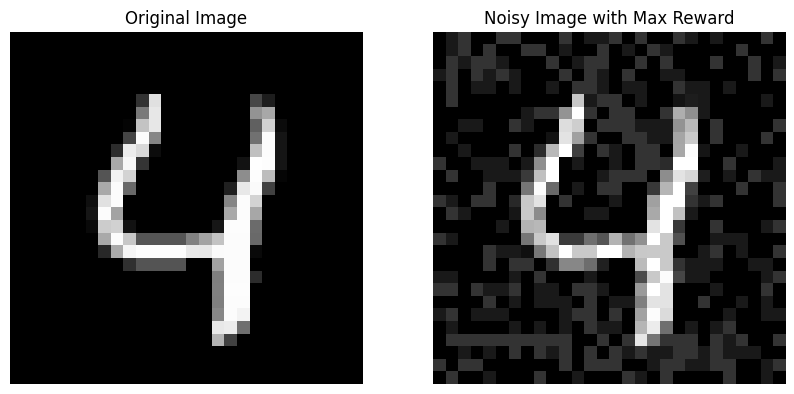

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0001
Predicted Digit for Best Noisy Image: 9


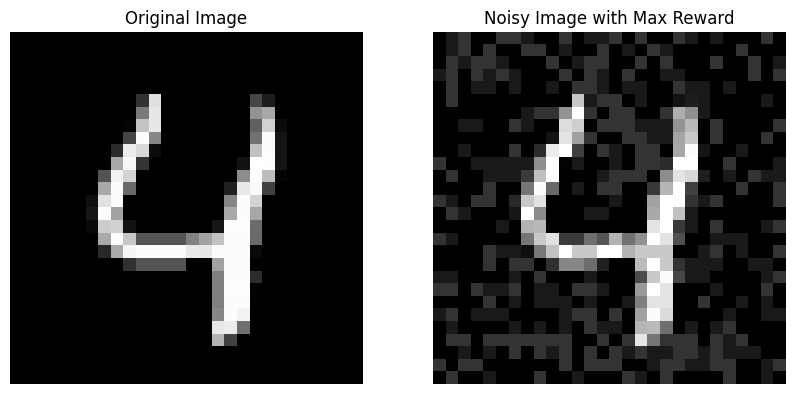

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0001
Predicted Digit for Best Noisy Image: 9


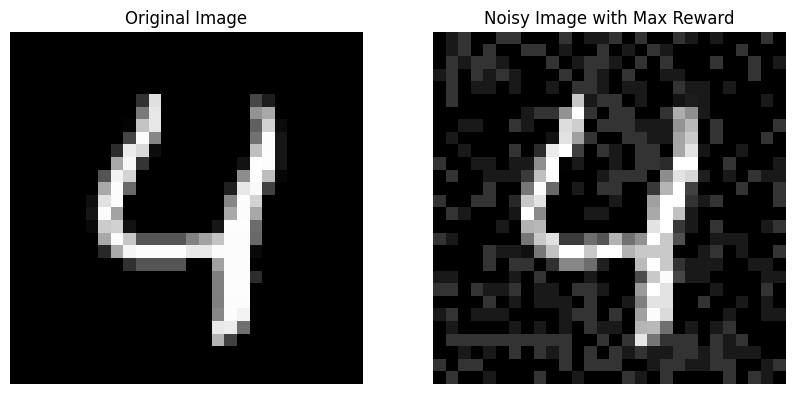

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0001
Predicted Digit for Best Noisy Image: 9


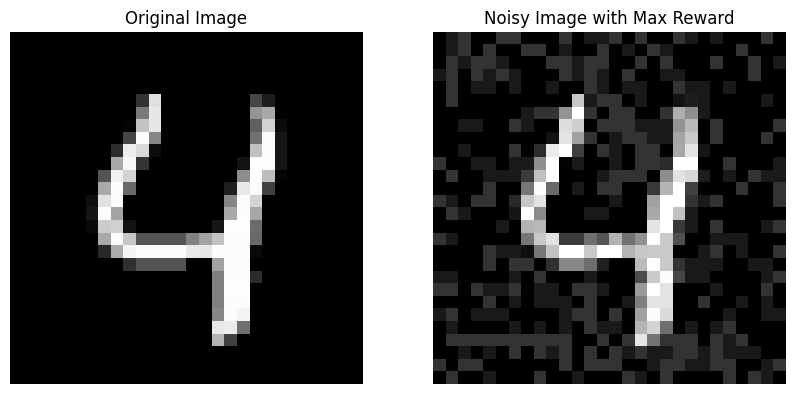

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0001
Predicted Digit for Best Noisy Image: 9


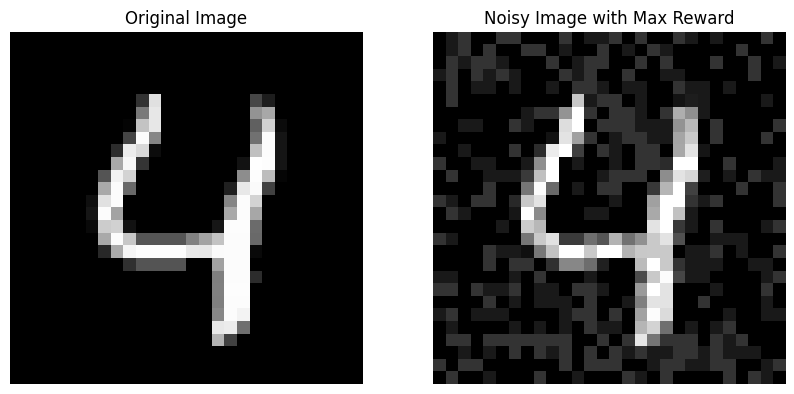

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0001
Predicted Digit for Best Noisy Image: 9


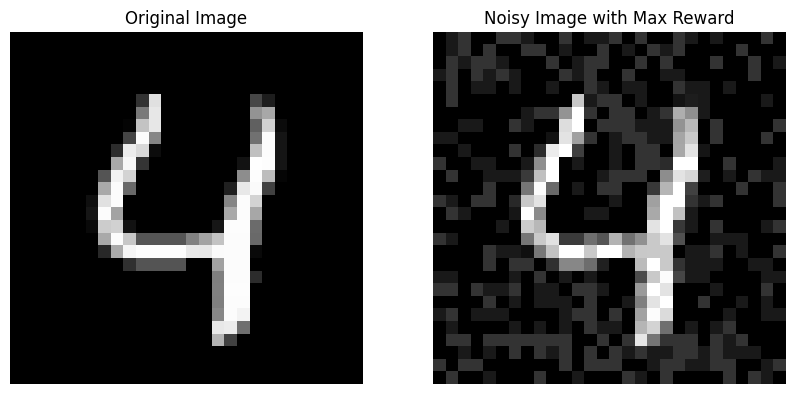

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0001
Predicted Digit for Best Noisy Image: 9


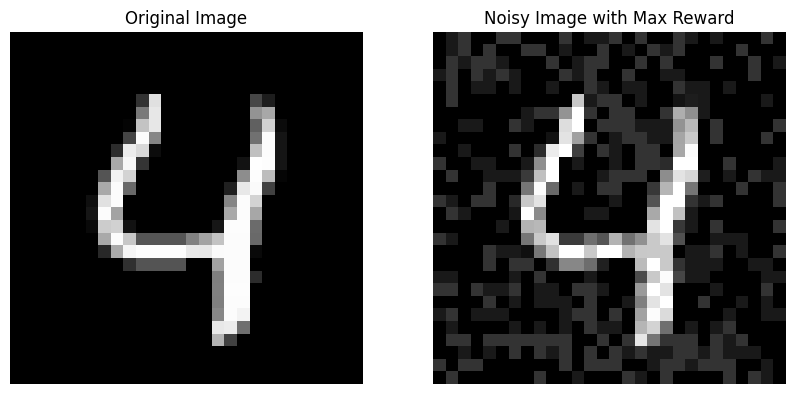

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0001
Predicted Digit for Best Noisy Image: 9


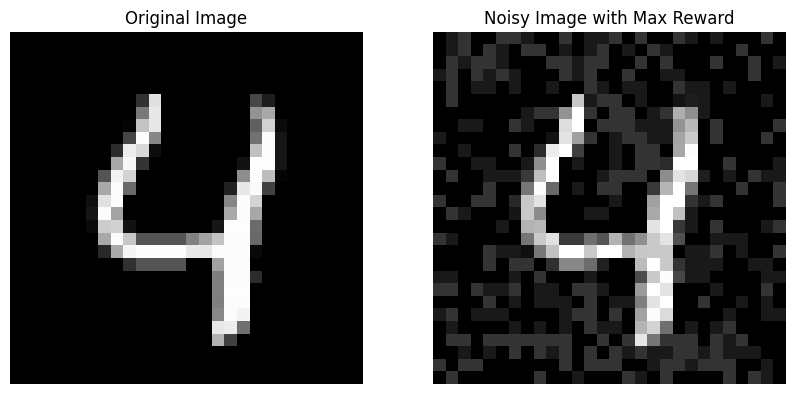

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0000
Predicted Digit for Best Noisy Image: 9


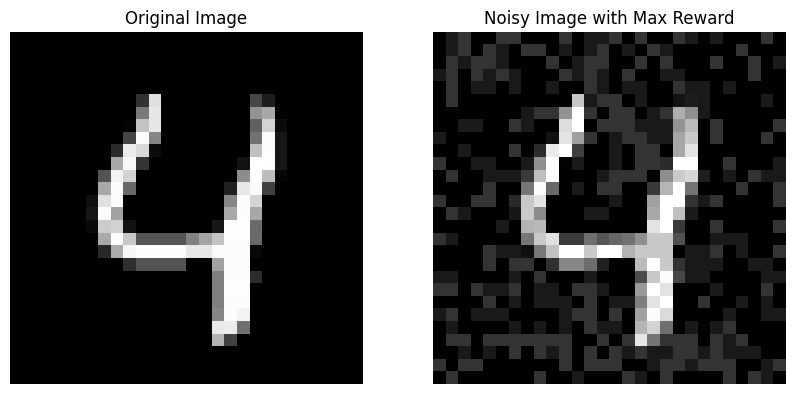

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0000
Predicted Digit for Best Noisy Image: 9


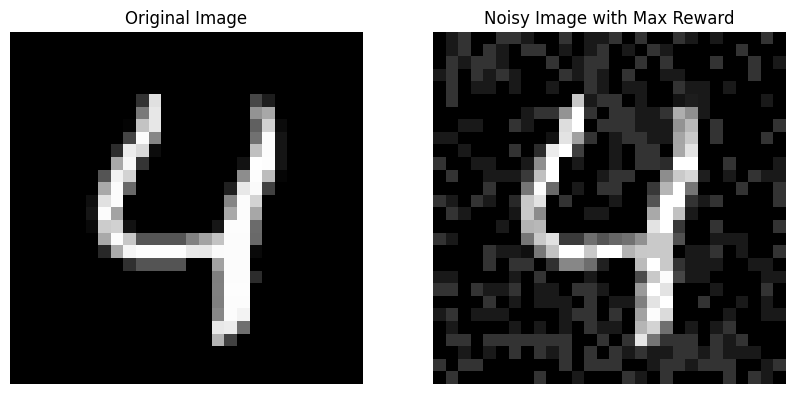

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0000
Predicted Digit for Best Noisy Image: 9


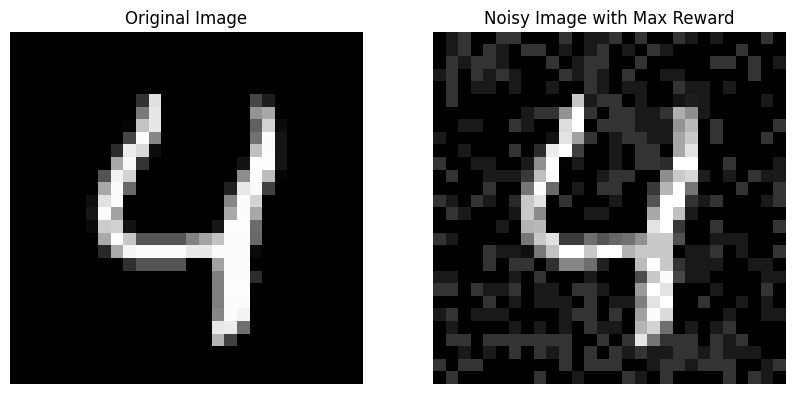

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0000
Predicted Digit for Best Noisy Image: 9


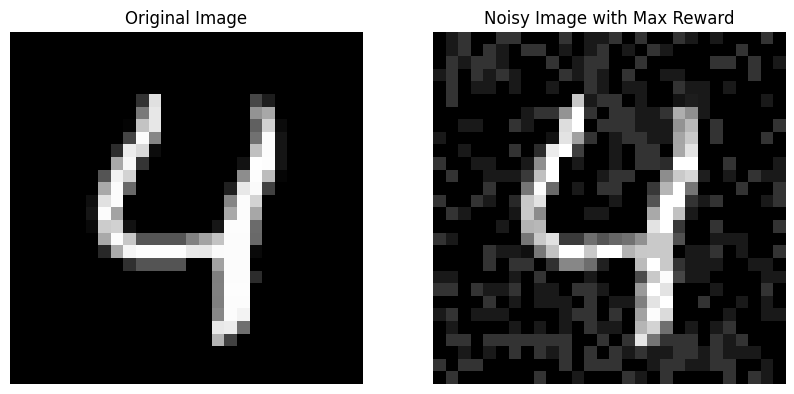

Original Confidence: 1.0000
Best Noisy Image Confidence: 0.0000
Predicted Digit for Best Noisy Image: 9


KeyboardInterrupt: 

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the evaluate function
def evaluate(image):
    """Function to evaluate the confidence of the model's prediction."""
    image_reshaped = image.reshape(1, 28, 28)  # Reshape the image for inference
    prediction = model.predict(image_reshaped,verbose=0)  # Get prediction from the model
    confidence =  prediction[0, 4] # Confidence is the max probability
    predicted_digit = np.argmax(prediction)  # Predicted class
    return predicted_digit, confidence

# Select a sample image of digit '4' from the test set
index_of_digit_4 = np.where(np.argmax(y_test, axis=1) == 4)[0][0]
sample_image = X_test[index_of_digit_4]

# Evaluate confidence of the original image
original_predicted_digit, original_confidence = evaluate(sample_image)

# Parameters for Monte Carlo simulation
num_samples = 100  # Number of noisy samples to generate
choices = [-2, -1, 0, 1, 2]
policy = np.zeros((sample_image.shape[0], sample_image.shape[1], len(choices)))

for i in range(sample_image.shape[0]):
      for j in range(sample_image.shape[1]):
        for k in range(len(choices)):
          policy[i][j][k] = np.random.choice([0.49,0.5,0.51], size=1)

for _ in range(100):
  noise_choice  = np.zeros((sample_image.shape[0], sample_image.shape[1]),dtype=np.uint8)
  noise =  np.zeros((sample_image.shape[0], sample_image.shape[1]))
  rewards = np.zeros((sample_image.shape[0], sample_image.shape[1], len(choices)))

  # Monte Carlo Simulation
  for _ in range(num_samples):
      # Generate random noise in the range -2, -1, 0, 1, 2
      for i in range(sample_image.shape[0]):
        for j in range(sample_image.shape[1]):
          # print(policy[i][j])
          # print(normalize(policy[i][j]))
          noise_choice[i][j]  = int(np.random.choice(len(choices),p = normalize(policy[i][j]) , size=1) )

          noise[i][j] = choices[noise_choice[i][j]] / 10
      noisy_image = sample_image + noise

      # Ensure the pixel values remain in the valid range [0, 1]
      noisy_image = np.clip(noisy_image, 0, 1)

      # Evaluate the confidence of the noisy image
      _, noisy_confidence = evaluate(noisy_image)

      # Calculate the confidence loss
      confidence_loss = original_confidence - noisy_confidence

      #update rewards
      for i in range(sample_image.shape[0]):
        for j in range(sample_image.shape[1]):
          rewards[i][j][noise_choice[i][j]] += confidence_loss
  # print(policy)
  # Find the maximum reward for each pixel and corresponding noise choice
  max_rewards = np.max(np.sum(rewards, axis=2), axis=(0, 1))
  max_reward_indices = np.unravel_index(np.argmax(np.sum(rewards, axis=2)), rewards.shape[:2])

  # Generate the noisy image with the highest reward
  best_noise = np.zeros((sample_image.shape[0], sample_image.shape[1]))

  for i in range(sample_image.shape[0]):
      for j in range(sample_image.shape[1]):
          best_noise[i][j] = choices[np.argmax(policy[i][j])]

  # Apply the best noise to the original sample image
  best_noisy_image = sample_image + best_noise / 10.0

  # Ensure the pixel values remain in the valid range [0, 1]
  best_noisy_image = np.clip(best_noisy_image, 0, 1)

  # # Plot the original and best noisy images for comparison
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.title('Original Image')
  plt.imshow(sample_image, cmap='gray')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title('Noisy Image with Max Reward')
  plt.imshow(best_noisy_image, cmap='gray')
  plt.axis('off')

  plt.show()

  # Evaluate the confidence of the best noisy image
  best_predicted_digit, best_confidence = evaluate(best_noisy_image)

  print(f"Original Confidence: {original_confidence:.4f}")
  print(f"Best Noisy Image Confidence: {best_confidence:.4f}")
  print(f"Predicted Digit for Best Noisy Image: {best_predicted_digit}")

  #update policy

  policy = policy + 0.5* rewards/num_samples



In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random
# Define the evaluate function
def evaluate(image):
    """Function to evaluate the confidence of the model's prediction."""
    image_reshaped = image.reshape(1, 28, 28)  # Reshape the image for inference
    prediction = model.predict(image_reshaped,verbose=0)  # Get prediction from the model
    confidence =  prediction[0, 4] # Confidence is the max probability
    predicted_digit = np.argmax(prediction)  # Predicted class
    return predicted_digit, confidence

# Select a sample image of digit '4' from the test set
index_of_digit_4 = np.where(np.argmax(y_test, axis=1) == 4)[0][0]
sample_image = X_test[index_of_digit_4]

# Evaluate confidence of the original image
original_predicted_digit, original_confidence = evaluate(sample_image)

# Parameters for Monte Carlo simulation
num_samples = 100  # Number of noisy samples to generate
choices = [-2, -1, 0, 1, 2]
policy = np.zeros((sample_image.shape[0], sample_image.shape[1], len(choices)))

for i in range(sample_image.shape[0]):
      for j in range(sample_image.shape[1]):
        for k in range(len(choices)):
          policy[i][j][k] = np.random.choice([0.49,0.5,0.51], size=1)

for _ in range(100):
  noise_choice  = np.zeros((sample_image.shape[0], sample_image.shape[1]),dtype=np.uint8)
  noise =  np.zeros((sample_image.shape[0], sample_image.shape[1]))
  rewards = np.zeros((sample_image.shape[0], sample_image.shape[1], len(choices)))
  e = 0.5
  # Monte Carlo Simulation
  for _ in range(num_samples):
      r = random.random()
      # Generate random noise in the range -2, -1, 0, 1, 2
      for i in range(sample_image.shape[0]):
        for j in range(sample_image.shape[1]):
          # print(policy[i][j])
          # print(normalize(policy[i][j]))
          if(r<e):
            noise_choice[i][j] = np.random.choice(len(choices), size=1)
          else:

              noise_choice[i][j]  = np.argmax(policy[i][j])

          noise[i][j] = choices[noise_choice[i][j]] / 10
      noisy_image = sample_image + noise

      # Ensure the pixel values remain in the valid range [0, 1]
      noisy_image = np.clip(noisy_image, 0, 1)

      # Evaluate the confidence of the noisy image
      _, noisy_confidence = evaluate(noisy_image)

      # Calculate the confidence loss
      confidence_loss = original_confidence - noisy_confidence

      #update rewards
      for i in range(sample_image.shape[0]):
        for j in range(sample_image.shape[1]):
          rewards[i][j][noise_choice[i][j]] += confidence_loss
  # print(policy)
  # Find the maximum reward for each pixel and corresponding noise choice
  max_rewards = np.max(np.sum(rewards, axis=2), axis=(0, 1))
  max_reward_indices = np.unravel_index(np.argmax(np.sum(rewards, axis=2)), rewards.shape[:2])

  # Generate the noisy image with the highest reward
  best_noise = np.zeros((sample_image.shape[0], sample_image.shape[1]))

  for i in range(sample_image.shape[0]):
      for j in range(sample_image.shape[1]):
          best_noise[i][j] = choices[np.argmax(policy[i][j])]

  # Apply the best noise to the original sample image
  best_noisy_image = sample_image + best_noise / 10.0

  # Ensure the pixel values remain in the valid range [0, 1]
  best_noisy_image = np.clip(best_noisy_image, 0, 1)

  # # Plot the original and best noisy images for comparison
  # plt.figure(figsize=(10, 5))

  # plt.subplot(1, 2, 1)
  # plt.title('Original Image')
  # plt.imshow(sample_image, cmap='gray')
  # plt.axis('off')

  # plt.subplot(1, 2, 2)
  # plt.title('Noisy Image with Max Reward')
  # plt.imshow(best_noisy_image, cmap='gray')
  # plt.axis('off')

  # plt.show()

  # Evaluate the confidence of the best noisy image
  best_predicted_digit, best_confidence = evaluate(best_noisy_image)

  print(f"Original Confidence: {original_confidence:.4f}")
  print(f"Best Noisy Image Confidence: {best_confidence:.4f}")
  print(f"Predicted Digit for Best Noisy Image: {best_predicted_digit}")

  #update policy

  policy = policy + 0.5* rewards/num_samples



<ipython-input-17-fa9c639fcde6>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  policy[i][j][k] = np.random.choice([0.49,0.5,0.51], size=1)
<ipython-input-17-fa9c639fcde6>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  noise_choice[i][j] = np.random.choice(len(choices), size=1)


Original Confidence: 1.0000
Best Noisy Image Confidence: 0.9998
Predicted Digit for Best Noisy Image: 4
Original Confidence: 1.0000
Best Noisy Image Confidence: 0.9963
Predicted Digit for Best Noisy Image: 4
Original Confidence: 1.0000
Best Noisy Image Confidence: 0.9928
Predicted Digit for Best Noisy Image: 4
Original Confidence: 1.0000
Best Noisy Image Confidence: 0.9931
Predicted Digit for Best Noisy Image: 4
Original Confidence: 1.0000
Best Noisy Image Confidence: 0.9931
Predicted Digit for Best Noisy Image: 4
Original Confidence: 1.0000
Best Noisy Image Confidence: 0.9931
Predicted Digit for Best Noisy Image: 4
Original Confidence: 1.0000
Best Noisy Image Confidence: 0.9931
Predicted Digit for Best Noisy Image: 4
Original Confidence: 1.0000
Best Noisy Image Confidence: 0.9931
Predicted Digit for Best Noisy Image: 4
Original Confidence: 1.0000
Best Noisy Image Confidence: 0.9931
Predicted Digit for Best Noisy Image: 4
Original Confidence: 1.0000
Best Noisy Image Confidence: 0.9931


KeyboardInterrupt: 